<a href="https://colab.research.google.com/github/A00163/image_classification_fastai/blob/main/classificationFruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LypdYaH9jErz5ORflOjF")
project = rf.workspace("joseph-nelson").project("fruits-dataset")
dataset = project.version(2).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-Dataset-2 in folder:: 100%|██████████| 2910/2910 [00:00<00:00, 5375.54it/s]


In [10]:
class_names = []
DATASET_PATH = "/content/Fruits-Dataset-2/train"
for folder_name in os.listdir(DATASET_PATH):
  class_names.append(folder_name)

In [11]:
class_names

['Tomato 4',
 'Walnut',
 'Tomato Yellow',
 'Tomato 3',
 'Tomato Maroon',
 'Tomato Cherry Red']

In [12]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [13]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [14]:
df.head()

,name,label
0,/content/Fruits-Dataset-2/train/Tomato 4/r_281_100_jpg.rf.0525772860381ae89c61fd0b01964267.jpg,0
1,/content/Fruits-Dataset-2/train/Tomato 4/120_100_jpg.rf.6d7f4cf27627fe50ce4cc38d9d5a1de8.jpg,0
2,/content/Fruits-Dataset-2/train/Tomato 4/41_100_jpg.rf.6f37f59b932f3a2d8360d76bea718411.jpg,0
3,/content/Fruits-Dataset-2/train/Tomato 4/r_57_100_jpg.rf.29210047a4f3ffe1ea5c5c210df47f03.jpg,0
4,/content/Fruits-Dataset-2/train/Tomato 4/96_100_jpg.rf.f338a449d9f3a97c6a2fb14d3a1ab46e.jpg,0


In [15]:
df.tail()

,name,label
2903,/content/Fruits-Dataset-2/train/Tomato Cherry Red/239_100_jpg.rf.65ae61f4590aaf8b56688b23fd637ff2.jpg,5
2904,/content/Fruits-Dataset-2/train/Tomato Cherry Red/275_100_jpg.rf.1b0465b3d5cb94506aff31422f8bc645.jpg,5
2905,/content/Fruits-Dataset-2/train/Tomato Cherry Red/r_270_100_jpg.rf.851609ca4b7832009944cb9e1f26ea31.jpg,5
2906,/content/Fruits-Dataset-2/train/Tomato Cherry Red/189_100_jpg.rf.921e07e7d77b760d07b53c2852c9e71c.jpg,5
2907,/content/Fruits-Dataset-2/train/Tomato Cherry Red/r_208_100_jpg.rf.69d4410ef13339edbdbf31600812a9b6.jpg,5


In [16]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

In [17]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

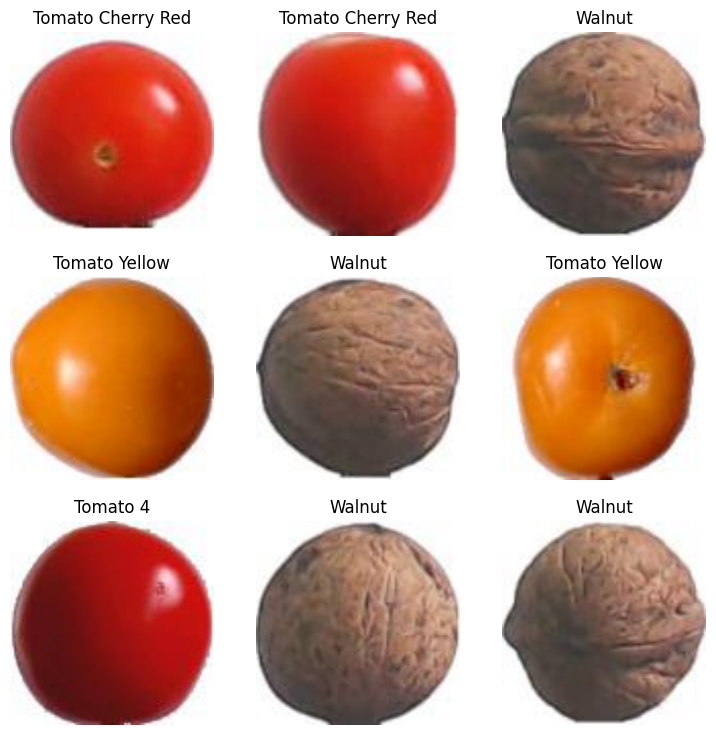

In [18]:
dls.show_batch()

In [19]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


In [20]:
model.fine_tune(
    epochs=1
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.060741,0.001085,1.000000,0.000000,20:29


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.054245,0.003088,0.998279,0.001721,29:37


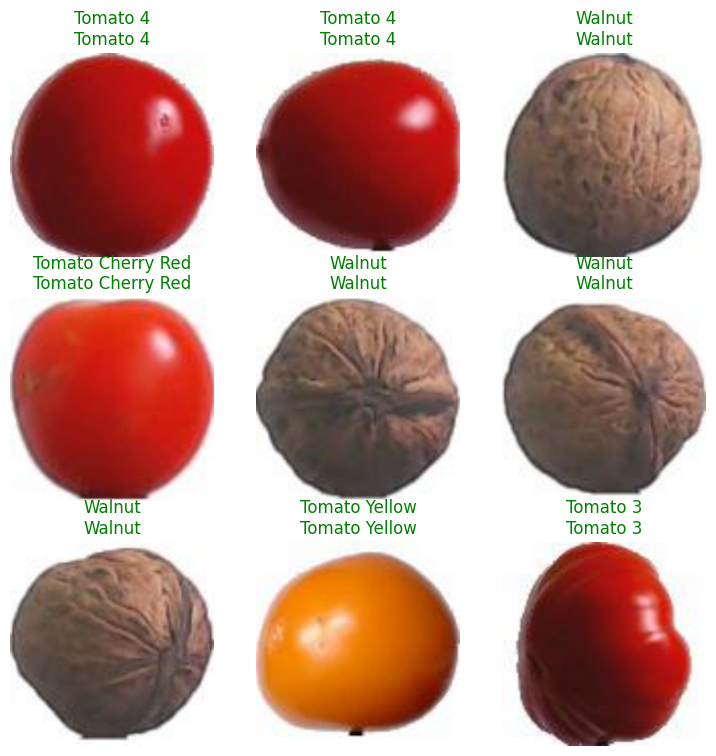

In [21]:
model.show_results()

In [22]:
model.export('fruit_classifier.pkl')

In [23]:
new_model = load_learner(f'{DATASET_PATH}/fruit_classifier.pkl')

In [24]:
new_model.predict(
    item ='/content/Fruits-Dataset-2/train/Tomato Yellow/106_100_jpg.rf.3ebc13ffe625c29872a857f48ff32cc6.jpg'
)

('Tomato Yellow',
 tensor(4),
 tensor([7.8115e-08, 1.9677e-06, 6.4752e-08, 5.0309e-07, 1.0000e+00, 3.0567e-08]))